# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Analyse des tests d'objectivité

---

# Initialisations

In [6]:
cd ../..

/Volumes/Geek/Work/Patat


In [7]:
import importlib
import pandas as pd
import seaborn as sns

# Chargement compilation des tests

In [8]:
filename = 'data/tmp/230612-CompilationLabels.csv'

In [9]:
df_obs = pd.read_csv(filename,decimal=',')

In [10]:
df_obs[df_obs['infox'].isna()]

,source,observateur,url,infox,entites_nommees,ouverture_esprit,faits,opinions,propos_raportes,sources_citees,fausse_nouvelle,insinuations,exageration,inverifiable,titre_decale,cherry_picking,justification infox,remarque observatoire,commentaire,remarque


In [11]:
df_obs['test']=df_obs['source'].apply(lambda s: 'CollectionTest' if s=='TestRecueil' or s=='Recueil' else s)

In [12]:
df_obs['test'].unique()

array(['CollectionTest', 'Verif', 'Test1', 'WorkshopObs', 'Test2'],
      dtype=object)

# Metriques

### Confusion matrix
| |Real 0|Real 1|
-|-|-
|Predicted 0| **TN** True Negative | **FN** False Negative |
|Predicted 1| **FP** False Positive| **TP** True Positive |


### Statdard metrics
\begin{equation*} \text{Accuracy} = \frac{TP+TN}{Total} \end{equation*}

\begin{equation*} \text{Recall} = \frac{TP}{TP+FN} \end{equation*}

\begin{equation*} \text{F1-score} = \frac{TP}{TP+\frac{1}{2}(FN+FP) } \end{equation*}

In [13]:
from sklearn import metrics

In [31]:
def compute_metrics(y_true,y_pred):
    results = {}
    results['accuracy']=metrics.accuracy_score(y_true, y_pred)
    results['recall']=metrics.recall_score(y_true, y_pred)
    results['f1']=metrics.f1_score(y_true, y_pred)
    cnf_matrix = metrics.confusion_matrix(y_true, y_pred)
    results['false_positive']=cnf_matrix[0,1]
    results['false_negative']=cnf_matrix[1,0]
    results['true_positive']=cnf_matrix[1,1]
    results['true_negative']=cnf_matrix[0,0]
    results['total']=len(y_true)
    results['nb_infox1']=y_true.sum()
    results['nb_infox2']=y_pred.sum()
    return results

In [32]:
def extract_results(df,source,obs1,obs2):
    df_test = pd.pivot_table(df[df['test']==source],index='url',columns='observateur',values='infox')
    df_test = df_test[df_test[obs1].notna()]
    df_test = df_test[df_test[obs2].notna()]
    results = compute_metrics(df_test[obs1],df_test[obs2])
    return pd.DataFrame(results,index=[f'{source} {obs1}-{obs2}'])

## Tests

In [33]:
pd.set_option('display.precision',3)

In [34]:
df_results1 = extract_results(df_obs,'Test1','FB','GP')

In [35]:
df_results1

,accuracy,recall,f1,false_positive,false_negative,true_positive,true_negative,total,nb_infox1,nb_infox2
Test1 FB-GP,0.938,1.0,0.833,6,0,15,75,96,15.0,21.0


In [36]:
df_results2 = extract_results(df_obs,'Test2','FB','GP')

In [37]:
df_results2 = pd.concat([df_results2,extract_results(df_obs,'Test2','FB','LL')])

In [38]:
df_results2 = pd.concat([df_results2,extract_results(df_obs,'Test2','GP','LL')])

In [39]:
df_results2

,accuracy,recall,f1,false_positive,false_negative,true_positive,true_negative,total,nb_infox1,nb_infox2
Test2 FB-GP,0.949,0.824,0.848,2,3,14,79,98,17.0,16.0
Test2 FB-LL,0.929,0.647,0.759,1,6,11,80,98,17.0,12.0
Test2 GP-LL,0.918,0.625,0.714,2,6,10,80,98,16.0,12.0


In [40]:
df_obs

,source,observateur,url,infox,entites_nommees,ouverture_esprit,faits,opinions,propos_raportes,sources_citees,...,insinuations,exageration,inverifiable,titre_decale,cherry_picking,justification infox,remarque observatoire,commentaire,remarque,test
0,Recueil,FB,https://www.alnas.fr/actualite/communaute/lara...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,CollectionTest
1,Recueil,FB,https://www.alnas.fr/actualite/en-vrac/quel-ar...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,CollectionTest
2,Recueil,FB,https://www.alnas.fr/actualite/politique/laust...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,CollectionTest
3,Recueil,FB,https://www.alnas.fr/actualite/communaute/nant...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,CollectionTest
4,Recueil,FB,https://www.alnas.fr/actualite/en-vrac/la-fran...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,le titre est décalé (donne une impression faus...,NaN,NaN,NaN,CollectionTest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,TestRecueil,GP,https://www.wikistrike.com/2022/06/irak-decouv...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,CollectionTest
1348,TestRecueil,GP,https://www.wikistrike.com/2022/07/n-ecrasez-p...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,CollectionTest
1349,TestRecueil,GP,https://www.wikistrike.com/2022/09/les-command...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,les commandos ukrainiens ont été entrainés en ...,NaN,NaN,NaN,CollectionTest
1350,TestRecueil,GP,https://www.wikistrike.com/2022/10/la-pologne-...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,La Pologne va envahir l'ouest de l'Ukraine,NaN,NaN,NaN,CollectionTest


In [41]:
df_results3 = extract_results(df_obs,'CollectionTest','FB','GP')

In [42]:
df_results3 = pd.concat([df_results3,extract_results(df_obs,'CollectionTest','FB','CN')])

In [43]:
df_results3

,accuracy,recall,f1,false_positive,false_negative,true_positive,true_negative,total,nb_infox1,nb_infox2
CollectionTest FB-GP,0.747,0.889,0.719,21,4,32,42,99,36.0,53.0
CollectionTest FB-CN,0.864,1.000,0.727,3,0,4,15,22,4.0,7.0


In [44]:
df_results=pd.concat([df_results3,df_results1,df_results2,])
df_results

,accuracy,recall,f1,false_positive,false_negative,true_positive,true_negative,total,nb_infox1,nb_infox2
CollectionTest FB-GP,0.747,0.889,0.719,21,4,32,42,99,36.0,53.0
CollectionTest FB-CN,0.864,1.000,0.727,3,0,4,15,22,4.0,7.0
Test1 FB-GP,0.938,1.000,0.833,6,0,15,75,96,15.0,21.0
Test2 FB-GP,0.949,0.824,0.848,2,3,14,79,98,17.0,16.0
Test2 FB-LL,0.929,0.647,0.759,1,6,11,80,98,17.0,12.0
Test2 GP-LL,0.918,0.625,0.714,2,6,10,80,98,16.0,12.0


In [45]:
df_sum = pd.pivot_table(df_obs,index='test',columns='observateur',values='infox',aggfunc='sum')

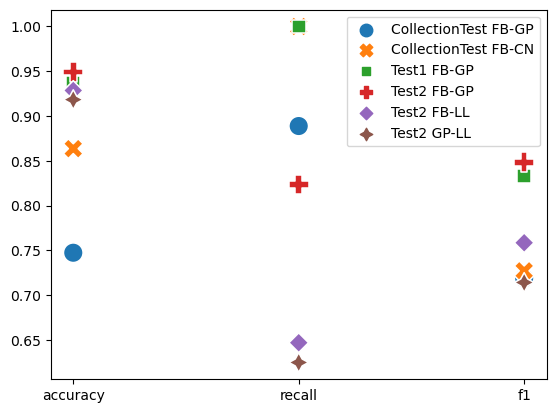

In [46]:
import matplotlib.pyplot as plt
sns.scatterplot(data=df_results[['accuracy','recall','f1']].T,s=200)
plt.legend(markerscale=1.5)

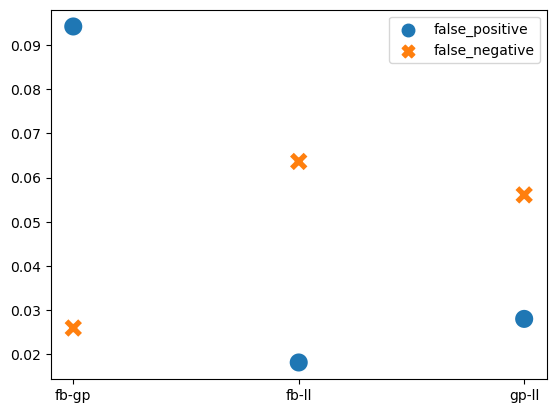

In [30]:
import matplotlib.pyplot as plt
sns.scatterplot(data=df_result[['false_positive','false_negative']],s=200)
plt.legend(markerscale=1.5)

# Sauvegarde des résultats
---

# Conclusions
---

# Bricolages
---